In [1]:
import tensorflow as tf
from PIL import Image
from skimage import data, io, filters
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
import os
import random
from tqdm import tqdm
from skimage.io import imread,imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json

Using TensorFlow backend.


In [2]:
IMG_WIDTH=128
IMG_HEIGHT=128
IMG_CHANNELS=3

TRAIN_IMAGE='Train Image/'
TRAIN_MASK='Train Mask/'

X_IMAGE_ids=next(os.walk(TRAIN_IMAGE))[2]
Y_MASK_ids=next(os.walk(TRAIN_MASK))[2]

X_Train=np.zeros((len(X_IMAGE_ids),IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS),dtype=np.uint8)
Y_Train=np.zeros((len(Y_MASK_ids),IMG_HEIGHT,IMG_WIDTH,1),dtype=np.bool)

In [3]:
TEST_IMAGE='Test Image/'
TEST_MASK='Test Mask/'

X_IMAGE_TEST_ids=next(os.walk(TEST_IMAGE))[2]
Y_MASK_TEST_ids=next(os.walk(TEST_MASK))[2]

X_Test=np.zeros((len(X_IMAGE_TEST_ids),IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS),dtype=np.uint8)
Y_Test=np.zeros((len(Y_MASK_TEST_ids),IMG_HEIGHT,IMG_WIDTH,1),dtype=np.bool)

In [4]:
for i,j in enumerate(X_IMAGE_ids):
    try:
        img=imread(TRAIN_IMAGE+str(i+1)+'.jpg')[:,:,:IMG_CHANNELS]
    except:
        img=imread(TRAIN_IMAGE+str(i+1)+'.jpg')
        img=cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    img=resize(img,(IMG_HEIGHT,IMG_WIDTH),mode='constant',preserve_range=True)
    X_Train[i]=img
    
    img=imread(TRAIN_MASK+str(i+1)+'.png')
    img=resize(img,(IMG_HEIGHT,IMG_WIDTH),mode='constant',preserve_range=True)
    img=np.expand_dims(img,axis=-1)
    Y_Train[i]=img
    
for i,j in enumerate(X_IMAGE_TEST_ids):
    try:
        img=imread(TEST_IMAGE+str(i+277)+'.jpg')[:,:,:IMG_CHANNELS]
    except:
        try:
            img=imread(TEST_IMAGE+str(i+277)+'.jpg')
            img=cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
        except:
            img=np.zeros((IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS),dtype=np.uint8)
    img=resize(img,(IMG_HEIGHT,IMG_WIDTH),mode='constant',preserve_range=True)
    X_Test[i]=img
    
    try:
        img=imread(TEST_MASK+str(i+277)+'.png')
        img=resize(img,(IMG_HEIGHT,IMG_WIDTH),mode='constant',preserve_range=True)
        img=np.expand_dims(img,axis=-1)
    except:
        img=np.zeros((IMG_HEIGHT,IMG_WIDTH,1),dtype=np.uint8)
    Y_Test[i]=img

D:\SOFTWARES\ANNACONDA\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [15]:
def Unet(X_Train,Y_Train):
    inputs=tf.keras.layers.Input((IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS))
    #KERAS TAKE FLOATING VALUES SO WE ARE DIVIDING It BY 255
    s=tf.keras.layers.Lambda(lambda x:x/255)(inputs)
    
    
    
    #DOWNSAMPLING 1/2 height and width of image
    
    # STEP 1
    CONVULTIONAL1=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(s)
    CONVULTIONAL1=tf.keras.layers.Dropout(0.1)(CONVULTIONAL1)
    #SINCE FIRST STEP OF MODEL REQUIRE 2 CONVULTIONAL SO I AM AGAIN APPLYING CONVULTIONAL NETWORK
    CONVULTIONAL1=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(CONVULTIONAL1)
    #MAX POOLING
    POOLING1=tf.keras.layers.MaxPool2D((2,2))(CONVULTIONAL1)
    
    #STEP 2
    CONVULTIONAL2=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(POOLING1)
    CONVULTIONAL2=tf.keras.layers.Dropout(0.1)(CONVULTIONAL2)
    #SINCE FIRST STEP OF MODEL REQUIRE 2 CONVULTIONAL SO I AM AGAIN APPLYING CONVULTIONAL NETWORK
    CONVULTIONAL2=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(CONVULTIONAL2)
    #MAX POOLING
    POOLING2=tf.keras.layers.MaxPool2D((2,2))(CONVULTIONAL2)
    
    
    #STEP 4
    CONVULTIONAL3=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(POOLING2)
    CONVULTIONAL3=tf.keras.layers.Dropout(0.2)(CONVULTIONAL3)
    #SINCE FIRST STEP OF MODEL REQUIRE 2 CONVULTIONAL SO I AM AGAIN APPLYING CONVULTIONAL NETWORK
    CONVULTIONAL3=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(CONVULTIONAL3)
    #MAX POOLING
    POOLING3=tf.keras.layers.MaxPool2D((2,2))(CONVULTIONAL3)
    
    
    #STEP 5
    CONVULTIONAL4=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(POOLING3)
    CONVULTIONAL4=tf.keras.layers.Dropout(0.2)(CONVULTIONAL4)
    #SINCE FIRST STEP OF MODEL REQUIRE 2 CONVULTIONAL SO I AM AGAIN APPLYING CONVULTIONAL NETWORK
    CONVULTIONAL4=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(CONVULTIONAL4)
    #MAX POOLING
    POOLING4=tf.keras.layers.MaxPool2D((2,2))(CONVULTIONAL4)
    
     #STEP 6
    CONVULTIONAL5=tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(POOLING4)
    CONVULTIONAL5=tf.keras.layers.Dropout(0.3)(CONVULTIONAL5)
    #SINCE FIRST STEP OF MODEL REQUIRE 2 CONVULTIONAL SO I AM AGAIN APPLYING CONVULTIONAL NETWORK
    CONVULTIONAL5=tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(CONVULTIONAL5)
    
    
    #EXPANSION PATH
    
    #STEP 1
    UPSAMPLING6=tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding='same')(CONVULTIONAL5)
    UPSAMPLING6=tf.keras.layers.concatenate([UPSAMPLING6,CONVULTIONAL4])
    CONVULTIONAL6=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(UPSAMPLING6)
    CONVULTIONAL6=tf.keras.layers.Dropout(0.2)(CONVULTIONAL6)
    #SINCE FIRST STEP OF MODEL REQUIRE 2 CONVULTIONAL SO I AM AGAIN APPLYING CONVULTIONAL NETWORK
    CONVULTIONAL6=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(CONVULTIONAL6)
    
    
    #STEP 2
    UPSAMPLING7=tf.keras.layers.Conv2DTranspose(64,(2,2),strides=(2,2),padding='same')(CONVULTIONAL6)
    UPSAMPLING7=tf.keras.layers.concatenate([UPSAMPLING7,CONVULTIONAL3])
    CONVULTIONAL7=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(UPSAMPLING7)
    CONVULTIONAL7=tf.keras.layers.Dropout(0.2)(CONVULTIONAL7)
    #SINCE FIRST STEP OF MODEL REQUIRE 2 CONVULTIONAL SO I AM AGAIN APPLYING CONVULTIONAL NETWORK
    CONVULTIONAL7=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(CONVULTIONAL7)
    
    #STEP 3
    UPSAMPLING8=tf.keras.layers.Conv2DTranspose(32,(2,2),strides=(2,2),padding='same')(CONVULTIONAL7)
    UPSAMPLING8=tf.keras.layers.concatenate([UPSAMPLING8,CONVULTIONAL2])
    CONVULTIONAL8=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(UPSAMPLING8)
    CONVULTIONAL8=tf.keras.layers.Dropout(0.1)(CONVULTIONAL8)
    #SINCE FIRST STEP OF MODEL REQUIRE 2 CONVULTIONAL SO I AM AGAIN APPLYING CONVULTIONAL NETWORK
    CONVULTIONAL8=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(CONVULTIONAL8)
    
    #STEP 4
    UPSAMPLING9=tf.keras.layers.Conv2DTranspose(16,(2,2),strides=(2,2),padding='same')(CONVULTIONAL8)
    UPSAMPLING9=tf.keras.layers.concatenate([UPSAMPLING9,CONVULTIONAL1],axis=3)
    CONVULTIONAL9=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(UPSAMPLING9)
    CONVULTIONAL9=tf.keras.layers.Dropout(0.1)(CONVULTIONAL9)
    #SINCE FIRST STEP OF MODEL REQUIRE 2 CONVULTIONAL SO I AM AGAIN APPLYING CONVULTIONAL NETWORK
    CONVULTIONAL9=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(CONVULTIONAL9)
    
    outputs=tf.keras.layers.Conv2D(1,(1,1),activation="sigmoid")(CONVULTIONAL9)
    
    
    model=tf.keras.Model(inputs=[inputs],outputs=[outputs])
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    checkpointer=tf.keras.callbacks.ModelCheckpoint('model_for_human.h5',verbose=1,save_weights_only=True)
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2,monitor='val_loss'),tf.keras.callbacks.TensorBoard(log_dir='logs')]
    
    results=model.fit(X_Train,Y_Train,validation_split=0.1,batch_size=16,epochs=40)
    
#     results=model.fit(X_Train,Y_Train,validation_split=0.1,epochs=5,batch_size=8)
    
    # serialize model to JSON
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model.h5")
    print("Saved model to disk")
    
    return model,results

In [16]:
model,results=Unet(X_Train,Y_Train)


Train on 248 samples, validate on 28 samples
Epoch 1/30
248/248 [==============================] - ETA: 1:13 - loss: 11.1628 - acc: 0.49 - ETA: 46s - loss: 10.9761 - acc: 0.5561 - ETA: 36s - loss: 11.0286 - acc: 0.565 - ETA: 29s - loss: 10.7344 - acc: 0.608 - ETA: 25s - loss: 10.4506 - acc: 0.642 - ETA: 22s - loss: 10.2101 - acc: 0.661 - ETA: 19s - loss: 10.1188 - acc: 0.673 - ETA: 16s - loss: 10.0563 - acc: 0.675 - ETA: 13s - loss: 9.8833 - acc: 0.685 - ETA: 11s - loss: 9.8965 - acc: 0.68 - ETA: 9s - loss: 9.9278 - acc: 0.6886 - ETA: 7s - loss: 9.8008 - acc: 0.693 - ETA: 5s - loss: 9.9364 - acc: 0.686 - ETA: 3s - loss: 9.9338 - acc: 0.687 - ETA: 1s - loss: 9.8450 - acc: 0.693 - 33s 133ms/sample - loss: 9.6629 - acc: 0.6978 - val_loss: 8.8617 - val_acc: 0.7022
Epoch 2/30
248/248 [==============================] - ETA: 24s - loss: 7.6484 - acc: 0.83 - ETA: 25s - loss: 8.4415 - acc: 0.79 - ETA: 23s - loss: 8.7033 - acc: 0.77 - ETA: 21s - loss: 8.8933 - acc: 0.76 - ETA: 19s - loss: 8.9160

248/248 [==============================] - ETA: 35s - loss: 4.4801 - acc: 0.89 - ETA: 31s - loss: 4.3545 - acc: 0.89 - ETA: 26s - loss: 4.4999 - acc: 0.89 - ETA: 23s - loss: 4.6997 - acc: 0.88 - ETA: 20s - loss: 4.4321 - acc: 0.89 - ETA: 18s - loss: 4.5328 - acc: 0.88 - ETA: 16s - loss: 4.5660 - acc: 0.88 - ETA: 14s - loss: 4.6023 - acc: 0.88 - ETA: 12s - loss: 4.8091 - acc: 0.87 - ETA: 10s - loss: 4.8428 - acc: 0.87 - ETA: 8s - loss: 4.7971 - acc: 0.8756 - ETA: 6s - loss: 4.7992 - acc: 0.875 - ETA: 4s - loss: 4.9063 - acc: 0.873 - ETA: 2s - loss: 4.9411 - acc: 0.872 - ETA: 0s - loss: 4.9728 - acc: 0.871 - 29s 119ms/sample - loss: 4.8768 - acc: 0.8721 - val_loss: 6.0997 - val_acc: 0.8078
Epoch 13/30
248/248 [==============================] - ETA: 25s - loss: 4.7234 - acc: 0.87 - ETA: 23s - loss: 4.7752 - acc: 0.86 - ETA: 21s - loss: 4.8658 - acc: 0.86 - ETA: 19s - loss: 4.7752 - acc: 0.86 - ETA: 18s - loss: 4.8797 - acc: 0.86 - ETA: 16s - loss: 4.9320 - acc: 0.86 - ETA: 14s - loss: 4.9

248/248 [==============================] - ETA: 26s - loss: 4.2510 - acc: 0.89 - ETA: 24s - loss: 4.0423 - acc: 0.89 - ETA: 22s - loss: 3.8697 - acc: 0.90 - ETA: 20s - loss: 3.8062 - acc: 0.90 - ETA: 18s - loss: 3.8242 - acc: 0.90 - ETA: 16s - loss: 3.8253 - acc: 0.90 - ETA: 15s - loss: 3.8109 - acc: 0.90 - ETA: 13s - loss: 3.7827 - acc: 0.90 - ETA: 11s - loss: 3.7596 - acc: 0.90 - ETA: 9s - loss: 3.6949 - acc: 0.9031 - ETA: 8s - loss: 3.5814 - acc: 0.906 - ETA: 6s - loss: 3.5266 - acc: 0.907 - ETA: 4s - loss: 3.5321 - acc: 0.908 - ETA: 2s - loss: 3.5213 - acc: 0.908 - ETA: 0s - loss: 3.5655 - acc: 0.907 - 29s 117ms/sample - loss: 3.5095 - acc: 0.9075 - val_loss: 5.8720 - val_acc: 0.8264
Epoch 24/30
248/248 [==============================] - ETA: 24s - loss: 4.0304 - acc: 0.88 - ETA: 23s - loss: 3.4781 - acc: 0.90 - ETA: 21s - loss: 3.2560 - acc: 0.91 - ETA: 20s - loss: 3.0489 - acc: 0.92 - ETA: 18s - loss: 3.0671 - acc: 0.92 - ETA: 16s - loss: 3.1381 - acc: 0.91 - ETA: 14s - loss: 3.3

In [17]:
pred=model.predict(X_Test,verbose=1)

14/14 [==============================] - 1s 77ms/sample


In [18]:
pred=(pred>0.5).astype(np.bool)

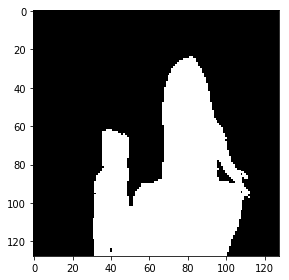

In [57]:
imshow(np.squeeze(Y_Test[10]))

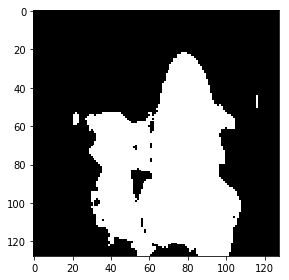

In [58]:
imshow(np.squeeze(pred[10]))

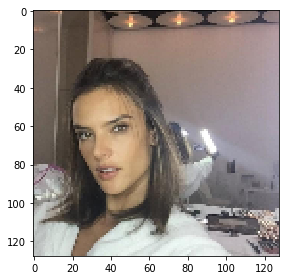

In [50]:
imshow(X_Test[11])

In [125]:
img=cv2.cvtColor(Y_Test[9].astype(np.uint8),cv2.COLOR_GRAY2BGR)

In [59]:
X_Test1=X_Test
for i in range(0,128):
    for j in range(0,128):
        for k in range(0,3):
            if Y_Test[11][i][j]==False:
                X_Test1[11][i][j][k]=255

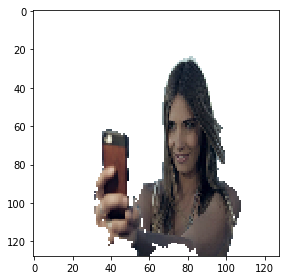

In [60]:
imshow(X_Test1[10])

In [39]:
import scipy.misc
scipy.misc.imsave('outfile.jpg', X_Test[10])

D:\SOFTWARES\ANNACONDA\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  
